<a href="https://colab.research.google.com/github/Moksha-nagraj/Marvel_tasks_lv1/blob/main/task5_Linear_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from scratch**
Steps:<br>
1. Understanding Loss Function:

* Utilize Mean Squared Error (MSE) as the chosen loss function for implementation.
* MSE computes the mean of the squared differences between predicted and true values.
2. Optimization Algorithm:

* Employ Gradient Descent as the optimization algorithm to find optimal parameter values.
* Gradient Descent iteratively updates parameters to minimize the loss function.
* Objective: Find optimal slope (m) and constant (b) values that minimize the MSE.

**3. Implementing Linear Regression from Scratch in Python:**

In [ ]:
#Import required modules
import numpy as np

#Defining the class
class LinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.b = 0
        self.n = len(x)

    def fit(self , epochs , lr):

        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.b

            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_b = (-1/self.n)*sum(self.label-y_pred)

            #Updating Parameters
            self.m = self.m - lr * D_m
            self.c = self.b - lr * D_b

    def predict(self , inp):
        y_pred = self.m * inp + self.b
        return y_pred

**4. Testing the Linear Regression Model**

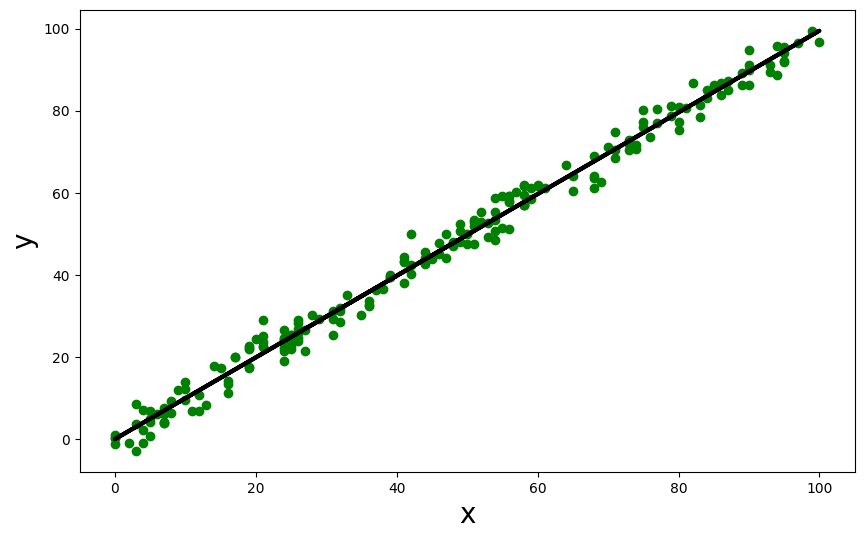

In [ ]:
#importing Matplotlib for plotting
import matplotlib.pyplot as plt

#Loding the data
df = pd.read_csv('/data_LinearRegression.csv')

#Preparing the data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

#Creating the class object
regressor = LinearRegression(x,y)

#Training the model with .fit method
regressor.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001

#Prediciting the values
y_pred = regressor.predict(x)

#Plotting the results
plt.figure(figsize = (10,6))
plt.scatter(x,y , color = 'green')
plt.plot(x , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

# **Logistic Regression from Scratch**

#### Explanation:
* Sigmoid Function: The sigmoid function converts the linear combination of inputs into a range of probabilities between 0 and 1.

* Training the Model: In this step, the model learns the optimal weights and bias using gradient descent to minimize the loss function.

* Prediction: After training, the model predicts the class labels based on the input features.

* Generate Synthetic Dataset: We generate a synthetic dataset for demonstration purposes.

* Train the Model: We train the logistic regression model on the synthetic dataset.

* Predict and Calculate Accuracy: We predict the labels for the training data and calculate the accuracy of the model.

* Plot Decision Boundary: We plot the decision boundary to visualize how the model separates the two classes in the feature space.

Accuracy: 0.56


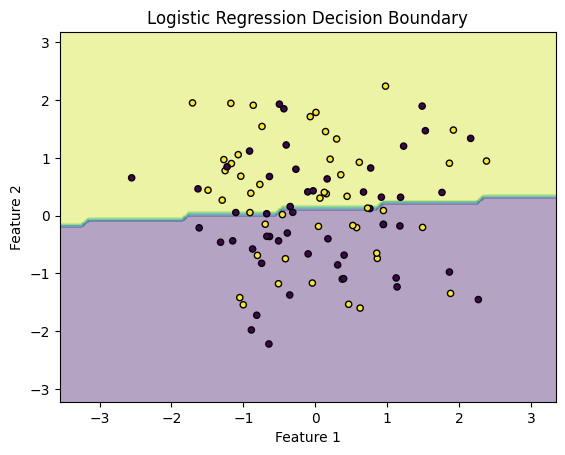

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return np.round(y_pred)

# Generate synthetic dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict on training data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
